In [1]:
from random import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../Aaron/DataAug')

import cropping

In [2]:
train = pd.read_json("../../train.json")

In [3]:
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis]
                          , x_band2[:, :, :, np.newaxis]
                         , ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)
x_band1.shape

(1604, 75, 75)

In [4]:
def crop(img):
    x = randint(0,15)
    y = randint(0,15)
    newimg = np.empty([60, 60])
    newimg = img[x:x+60, y: y+60]
    return newimg

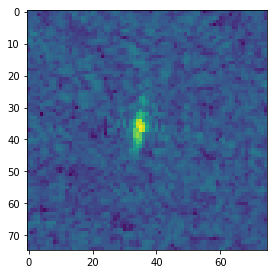

In [5]:
fig = plt.figure(1,figsize=(15,15))
ax = fig.add_subplot(3,3,1)
ax.imshow(x_band1[0])
plt.show()

In [6]:
cropimg = crop(x_band1[0])

In [7]:
cropimg.shape

(60, 60)

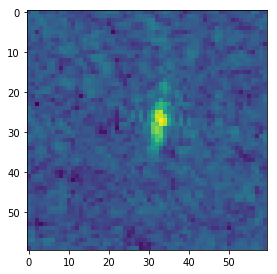

In [8]:
fig = plt.figure(1, figsize = (15,15))
ax = fig.add_subplot(3,3,1)
ax.imshow(cropimg)
plt.show()

In [9]:
inc_angle = train.inc_angle.replace('na', 0)

In [12]:
newimages, newangles = cropping.crop_aug(x_band1, inc_angle, 5)

100%|██████████| 1604/1604 [00:00<00:00, 20833.07it/s]


In [13]:
newimages.shape

(8020, 60, 60)

In [15]:
X_train.shape

(1604, 75, 75, 3)

In [16]:
testimg, newangles = cropping.crop_aug(X_train, inc_angle, 5)

100%|██████████| 1604/1604 [00:00<00:00, 20799.51it/s]


In [17]:
testimg.shape

(8020, 60, 60, 3)

In [20]:
inc_angle.shape

(1604,)

In [21]:
test = pd.read_json("../../test.json")

In [22]:
y_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
y_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])

In [23]:
y_band1.shape

(8424, 75, 75)

In [29]:
counter = 0

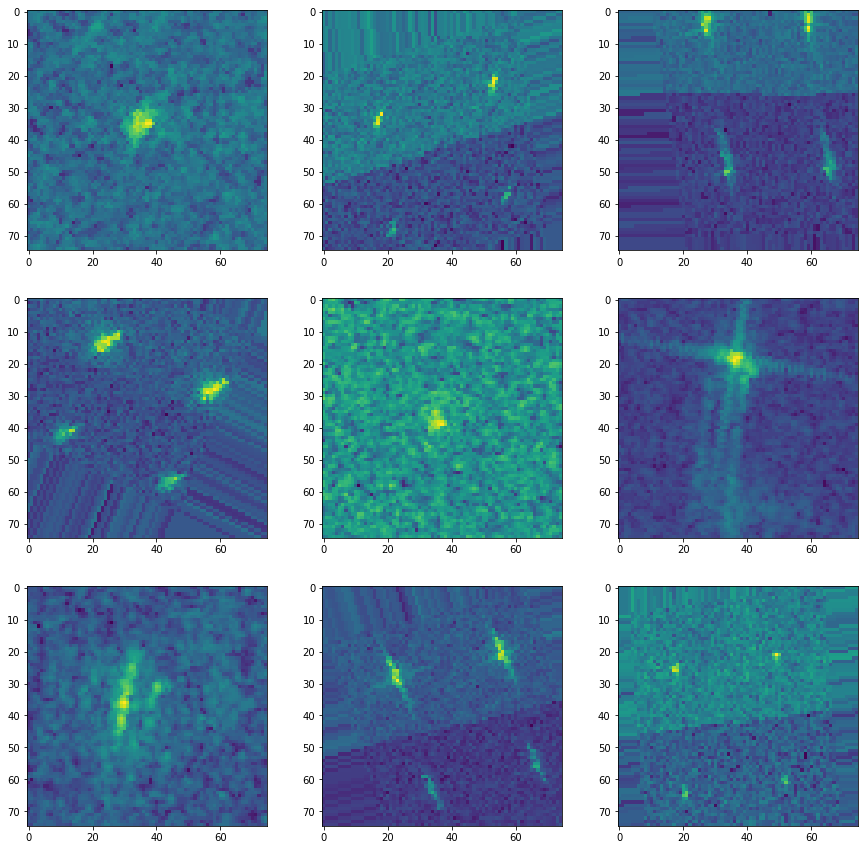

In [39]:
for i in range(9):
    fig = plt.figure(1, figsize = (15,15))
    ax = fig.add_subplot(3,3, i+ 1)
    ax.imshow(y_band1[counter])
    counter = counter + 1
plt.show()